# Import necessary libraries

In [25]:
import numpy as np  # For numerical operations and random number generation
import pandas as pd  # For handling datasets in DataFrame format
from sklearn.cluster import KMeans  # K-Means clustering algorithm
from sklearn.metrics import silhouette_score  # To evaluate clustering performance
from sklearn.preprocessing import StandardScaler  # For feature scaling
import warnings  # To handle warnings
import matplotlib.pyplot as plt  # For data visualization

# Ignore warnings to keep output clean
warnings.filterwarnings("ignore")

# Set a fixed random seed for reproducibility
np.random.seed(42)

In [26]:
# Load the dataset from a TSV (Tab-Separated Values) file into a Pandas DataFrame
df = pd.read_csv("student_clustering.tsv", sep="\t")  
# pd.read_csv(): Reads a dataset from a file.
# "student_clustering.tsv": The filename of the dataset.
# sep="\t": Specifies that the file is tab-separated (TSV format) instead of the default comma-separated (CSV format).

In [27]:
df.head()

,cgpa,ML
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


# Standardization
## Why Standardization?
Helps K-Means clustering work better by ensuring all features contribute equally (especially if they have different scales).
Prevents features with larger numerical ranges from dominating the clustering process.

In [28]:
# Initialize the StandardScaler to normalize the dataset
scaler = StandardScaler()  

# Fit the scaler to the dataset and transform it to have zero mean and unit variance
scaled_df = scaler.fit_transform(df)  

## Explanation:
- ## wcss (Within-Cluster Sum of Squares):
1. Measures how compact the clusters are.
2. Lower values indicate better clustering (up to a certain point before overfitting).

- ## silhouette_scores:
1. Measures how well-separated clusters are.
2. A higher silhouette score indicates well-defined clusters.

- ## k_values = range(2, 11):
1. Defines the range of k values to test (starting from 2 because k=1 is trivial).
2. Typically, clustering algorithms require testing multiple values of k to find the optimal number of clusters.

This setup helps in evaluating the best number of clusters using Elbow Method (WCSS) and Silhouette Score. 🚀

In [29]:
# Initialize an empty list to store Within-Cluster Sum of Squares (WCSS) for different cluster sizes
wcss = []  

# Initialize an empty list to store silhouette scores for different cluster sizes
silhouette_scores = []  

# Define a range of values for the number of clusters (k) to evaluate, from 2 to 10
k_values = range(2, 11)  

In [30]:
# Iterate through different values of k (number of clusters) to evaluate clustering performance
for k in k_values:
    # Initialize the K-Means clustering model with the current k value
    kmeans = KMeans(n_clusters=k, max_iter=300, init="k-means++")  

    # Fit the model to the scaled data and predict cluster labels
    cluster_labels = kmeans.fit_predict(scaled_df)  

    # Append the Within-Cluster Sum of Squares (WCSS) to the list
    wcss.append(kmeans.inertia_)  

    # Calculate and store the Silhouette Score for the current clustering result
    silhouette_scores.append(silhouette_score(scaled_df, cluster_labels))  

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

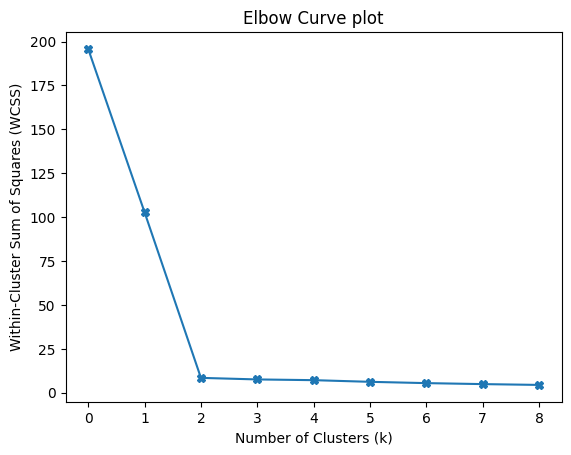

In [34]:
# Plot the Within-Cluster Sum of Squares (WCSS) values to visualize the Elbow Method
plt.plot(wcss, marker="X")  

# Set the title for the plot
plt.title("Elbow Curve plot")  
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")

Text(0, 0.5, 'Silhouette Score')

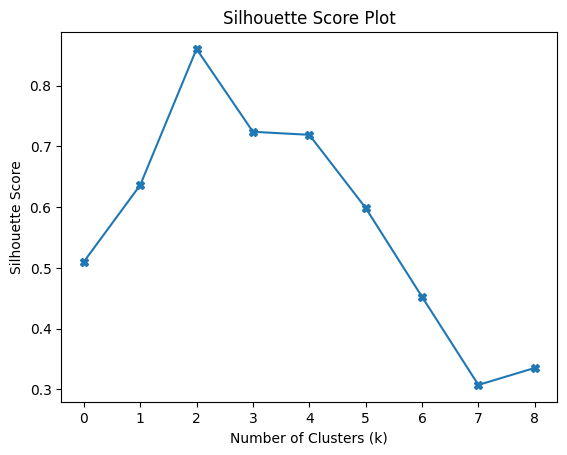

In [33]:
# Plot the silhouette scores for different cluster sizes
plt.plot(silhouette_scores, marker="X")  
plt.title("Silhouette Score Plot")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

In [36]:
# Find the optimal number of clusters (k) based on the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]  

# Retrieve the maximum silhouette score for reference
optimal_silhouette_score = max(silhouette_scores)  

In [37]:
print("Optimal No. of K for cluster is:", optimal_k)
print("Best Silhouette score is:", optimal_silhouette_score)

Optimal No. of K for cluster is: 4
Best Silhouette score is: 0.8605024348886897


In [40]:
# Initialize the K-Means model using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, init="k-means++")  

# Fit the model to the scaled data and assign cluster labels to each data point
df["Clusters"] = kmeans.fit_predict(scaled_df)  # Assigns the predicted cluster labels as a new column "Clusters" in the original dataframe (df).

In [41]:
df.head()

,cgpa,ML,Clusters
0,5.13,88,2
1,5.90,113,1
2,8.36,93,3
3,8.27,97,3
4,5.45,110,1


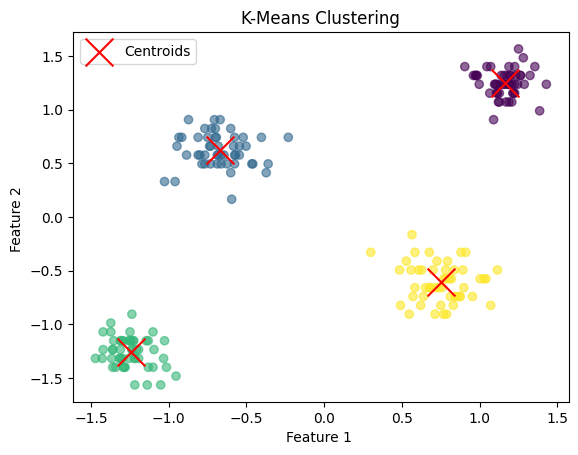

In [43]:
# Scatter plot of clustered data points
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df["Clusters"], cmap="viridis", alpha=0.6)

# Scatter plot of cluster centroids (marked as "X" in red)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker="x", s=400, color="red", label="Centroids")

# Set the title for the plot
plt.title("K-Means Clustering")

# Add labels for clarity
plt.xlabel("Feature 1 ")
plt.ylabel("Feature 2 ")

# Show the legend
plt.legend()

# Display the plot
plt.show()

# KMeans from Scratch

In [74]:
np.random.seed(42)

In [87]:
# Generate synthetic clustered data
data = np.vstack([
    np.random.randn(2000, 2) * 5 + center  # Generate 2000 points per cluster
    for center in np.random.randint(10, 100, (5, 2))  # Randomly generate 5 cluster centers
])

In [88]:
len(data)

10000

In [89]:
import numpy as np

class KMeans:
    def __init__(self, k=5, max_iter=100):
        """
        Initializes the KMeans clustering algorithm.

        Parameters:
        - k (int): Number of clusters.
        - max_iter (int): Maximum number of iterations for convergence.
        """
        self.k = k  # Number of clusters
        self.max_iter = max_iter  # Maximum iterations
        self.centroids = None  # Placeholder for cluster centroids

    def fit(self, data):
        """
        Fits the KMeans clustering model to the provided dataset.

        Parameters:
        - data (numpy.ndarray): The dataset to cluster.

        Steps:
        1. Randomly initialize 'k' centroids from the dataset.
        2. Iterate for 'max_iter' times or until centroids stop changing:
           - Assign each data point to the nearest centroid.
           - Compute new centroids based on cluster assignments.
           - If centroids do not change, stop early (convergence).
        """
        # Step 1: Randomly select 'k' initial centroids from the dataset
        self.centroids = data[np.random.choice(len(data), self.k, replace=False)]

        for _ in range(self.max_iter):
            # Step 2: Compute distances and assign labels
            # Compute Euclidean distance from each point to each centroid
            labels = np.argmin(np.linalg.norm(data[:, None] - self.centroids, axis=2), axis=1)

            # Step 3: Compute new centroids as the mean of assigned points
            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.k)])

            # Step 4: Check if centroids have changed; if not, stop iterating
            if np.all(self.centroids == new_centroids):
                break  # Convergence reached

            # Update centroids
            self.centroids = new_centroids

        # Store final cluster assignments
        self.labels = labels

    def compute_wcss(self, data):
        """
        Computes the Within-Cluster Sum of Squares (WCSS), a measure of clustering quality.

        Parameters:
        - data (numpy.ndarray): The dataset for which WCSS is calculated.

        Returns:
        - float: The total WCSS value.

        Explanation:
        - WCSS is computed as the sum of squared distances between each point and its assigned centroid.
        - Lower WCSS values indicate tighter clusters.
        """
        return sum(np.sum((data[self.labels == i] - centroid) ** 2) for i, centroid in enumerate(self.centroids))

In [96]:
# Initialize empty lists to store evaluation metrics
wcss = []  # List to store Within-Cluster Sum of Squares (WCSS) for each k
silhouette_scores = []  # List to store silhouette scores for each k

# Define the range of k values to evaluate
k_value = range(2, 11)  # Testing k values from 2 to 10

In [97]:
# Loop through different values of k (number of clusters)
for k in k_value:
    # Initialize the KMeans model with k clusters
    kmeans = KMeans(k=k)  
    
    # Fit the model to the dataset
    kmeans.fit(data)  
    
    # Compute Within-Cluster Sum of Squares (WCSS) and store it
    wcss.append(kmeans.compute_wcss(data))  
    
    # Compute Silhouette Score and store it
    silhouette_scores.append(silhouette_score(data, kmeans.labels))

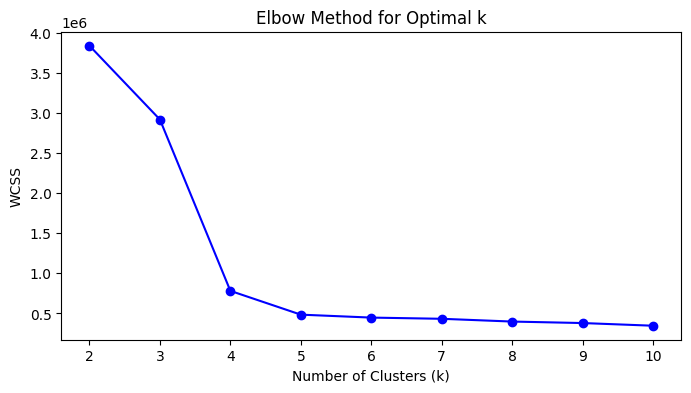

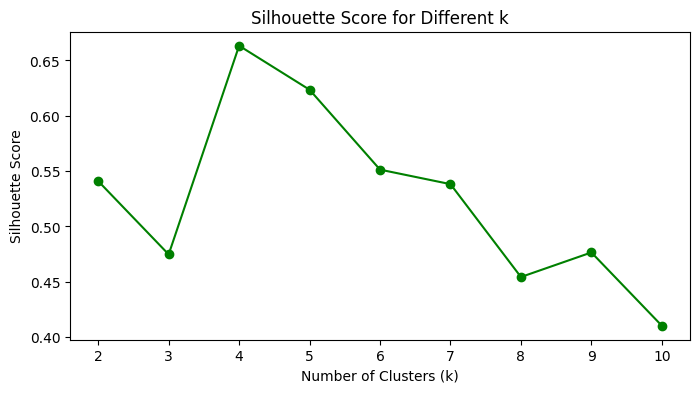

In [98]:
import matplotlib.pyplot as plt

# Plot the Elbow Method using WCSS
plt.figure(figsize=(8, 4))
plt.plot(k_value, wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot the Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(k_value, silhouette_scores, marker="o", linestyle="-", color="g")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.show()

In [99]:
# Determine the optimal number of clusters (k) using the highest Silhouette Score
optimal_k = k_value[np.argmax(silhouette_scores)]  

# Store the highest Silhouette Score obtained
optimal_silhouette_score = max(silhouette_scores)  

In [100]:
print("Optimal No. of K for cluster is:", optimal_k)
print("Best Silhouette score is:", optimal_silhouette_score)

Optimal No. of K for cluster is: 4
Best Silhouette score is: 0.6633293014364674


In [94]:
kmeans = KMeans(k = optimal_k)
kmeans.fit(data)

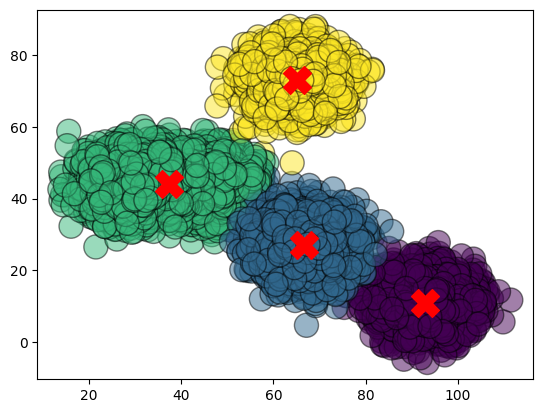

In [95]:
plt.scatter(data[:, 0], data[:, 1], s = 300, c = kmeans.labels, edgecolor = "black", alpha = 0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker = "X", c="red", s = 400)